# Analyse data

## Preconditions

### Precondition 1
Need to import libraries **only once** each time jupiter notebook is launched

In [1]:
import pandas

from ipyfilechooser import FileChooser

import sys 
import os

abs_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, abs_path)

from src.common_helpers import make_text_pandas_header_compatible
from src.extended_pandas_series import ExtendedSeries
from src.plot_helpers import plot_bar_chart, plot_1_10_hist_chart, plot_text_answer, plot_multichoice_with_other


## Read the file
### Step 1
Read the file, remove unparsible characters, and print available columns

In [2]:
# open excel file as pandas dataframe
# file_path = raw_data.selected
file_path = "/Users/obondarev/work/github/neu-capstone/Northeastern x Big Sky - Franchise Research Survey.xlsx"

raw_df = pandas.read_excel(io=file_path,
                           sheet_name='Form1')

# remove illegal characters from column names
headers_list = raw_df.columns.values.tolist()
headers_list = list(map(make_text_pandas_header_compatible, headers_list))
raw_df.columns = headers_list

# Print result
print(f'All columns after cleanup:')
print(*headers_list, sep="\n")

All columns after cleanup:
ID
Start time
Completion time
Email
Name
Have you hired Big Sky Franchise Team
How likely would you recommend Big Sky Franchise Team to a friend or colleague 1 is not at all likely and 10 is extremelylikely
What year did you start franchising
Did you complete the franchise process
What do you think are Big Skys Franchise Team strengths
What do you think are Big Skys Franchise Team weaknesses
How would you rate your overall experience while working with Big Sky on a scale of 110 1 worst  10 best
Do you have a franchise or plan to start oneSelect all that apply
How many locations do you currently have
What were the reasons to close the franchise Select all that apply
What areas do you need help with Select all that apply
Would you like to participate in an optional interview to share more insights
Please share your email so that we may contact you for an optional interview Leave empty if you prefer to be anonymous
Business Name Leave empty if you prefer to be a

### Step 2
Choose columns that you will be working with by listing them below. Use single quotes and seperate by comas.

In [3]:
necessary_columns = [
    'Have you hired Big Sky Franchise Team',
    'How likely would you recommend Big Sky Franchise Team to a friend or colleague 1 is not at all likely and 10 is extremelylikely',
    'If you were to do it all over would you hire Big Sky again',
    'If no could you please tell why',
    'What year did you start franchising',
    'How many total franchises have you sold since you started franchisingif not applicable enter NA',
    'How many franchises did you sell in your first yearif not applicable enter NA',
    'How many franchises did you sell in your second year if not applicable enter NA',
    'How many franchises did you sell in your third yearif not applicable enter NA',
    'What were your biggest challenges or obstacles to launching your franchise program',
    'What were your biggest challenges to selling franchises',
    'What have been your biggest challenges in supporting your franchisees select all that apply2',
    'What areas do you need help with Select all that apply',
    'Would you like to participate in an optional interview to share more insights',
    'Please share your email so that we may contact you for an optional interview Leave empty if you prefer to be anonymous',
    'Business Name Leave empty if you prefer to be anonymous',
    ]


### Step 3
Filter columns based on the list above

In [4]:
df = raw_df.filter(items=necessary_columns, axis=1)

## Parse questions

### 1. Have you hired Big Sky Franchise Team?

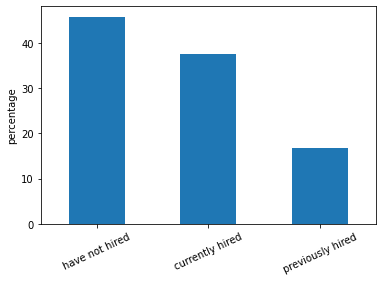

In [5]:
plot_bar_chart(df['Have you hired Big Sky Franchise Team'])

### 2. How likely would you recommend Big Sky Franchise Team to a friend or colleague? 

Mean value is 9.2


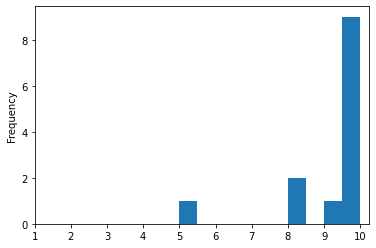

In [6]:
column_name = 'How likely would you recommend Big Sky Franchise Team to a friend or colleague 1 is not at all likely and 10 is extremelylikely'
plot_1_10_hist_chart(df[column_name])

### 3. If you were to do it all over, would you hire Big Sky again?

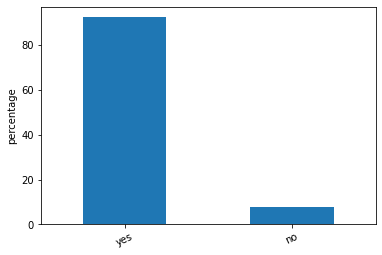

In [7]:
# Drop NaN values. Are they coming from non customers? Need to add a better filter... TBD!
column_name = 'If you were to do it all over would you hire Big Sky again'
plot_bar_chart(ExtendedSeries(df[column_name]).filter_out_nan())

### 4. If no, could you please tell why?

In [8]:
# Only single value so far. skipping

### 5. What year did you start franchising?

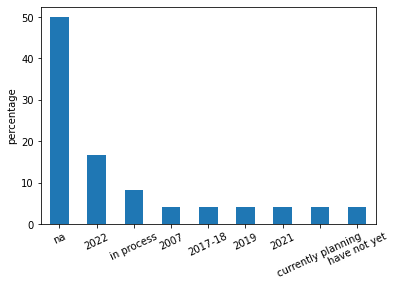

In [9]:
plot_bar_chart(df['What year did you start franchising'])

### 6/7/8/9. How many total franchises have you sold ...

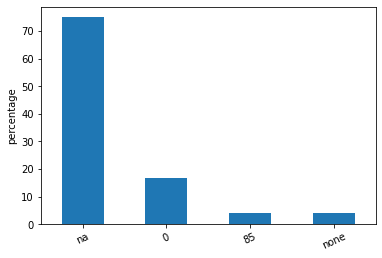

In [10]:
column_name = 'How many total franchises have you sold since you started franchisingif not applicable enter NA'
plot_bar_chart(df[column_name])

### 10. What were your biggest challenges or obstacles to launching your franchise program?

All keywords:
Counter({'na': 14, 'budget': 2, 'consultant': 1, 'franchise': 1, 'pandemic': 1, 'documents': 1, 'brand': 1, 'house': 1, 'person': 1, 'fdd': 1, 'marketing': 1, 'process': 1, 'set': 1, 'franchises': 1, 'numbers': 1, 'partner': 1, 'program': 1, 'workload': 1})


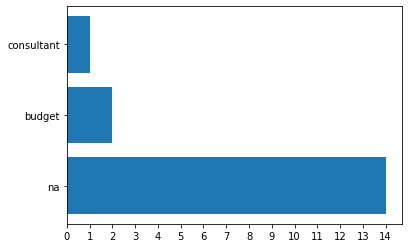

In [11]:
column_name = 'What were your biggest challenges or obstacles to launching your franchise program'
plot_text_answer(df[column_name], top=3)

### 11. What were your biggest challenges to selling franchises?

All keywords:
Counter({'na': 19, 'generation': 1, 'lead': 1, 'deals': 1, 'validation': 1, 'phase': 1, 'partner': 1, 'game': 1, 'leads': 1, 'money': 1, 'numbers': 1, 'sale': 1})


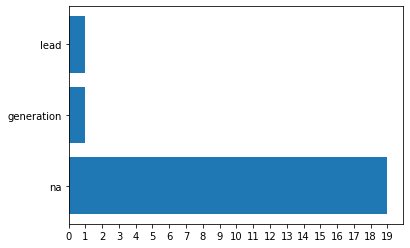

In [12]:
column_name = 'What were your biggest challenges to selling franchises'
plot_text_answer(df[column_name], top=3)

### 12. What have been your biggest challenges in supporting your franchisees

All keywords:
Counter({'no_response': 9, 'na': 6, 'answer': 1, 'partners': 1})


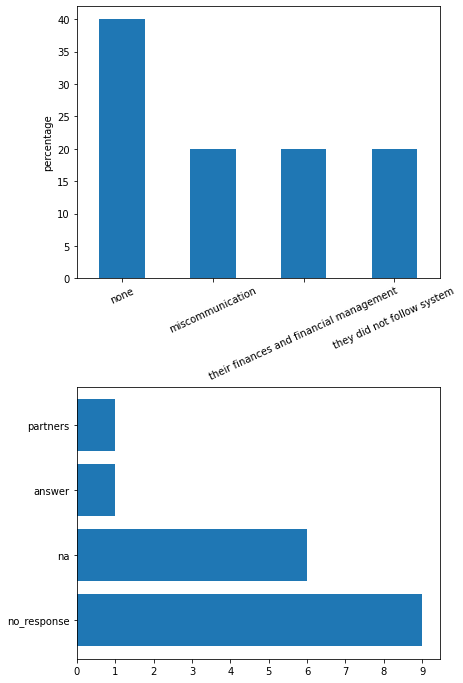

In [13]:
column_name = 'What have been your biggest challenges in supporting your franchisees select all that apply2'
expected_values = [
	'None', 'Their motivation', 'They did not follow system', 'Their finances and financial management', 
	'Lack of marketing spend by franchisee', 'Quality issues', 
	'My (or franchisor) coaching skills', 'Miscommunication'
]
plot_multichoice_with_other(series=df[column_name], main_values=expected_values, top=5)

### 13. What areas do you need help with?

All keywords:
Counter({'no_response': 11, 'business': 1, 'destruction': 1})


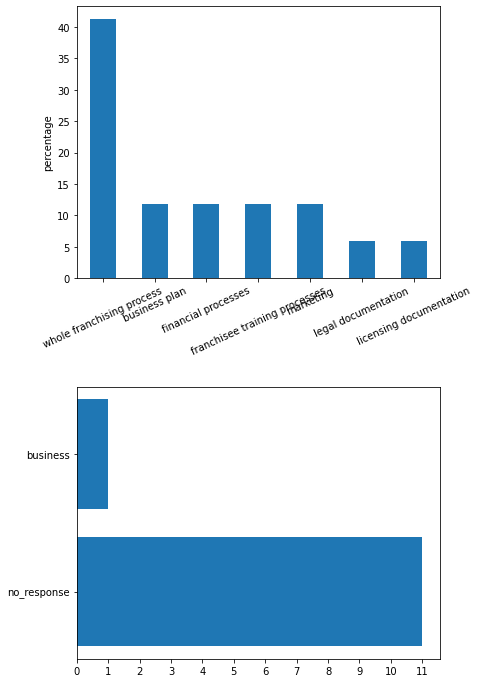

In [14]:
column_name = 'What areas do you need help with Select all that apply'
expected_values = [
	'None', 'Whole franchising process', 'Business plan', 'Financial processes', 
	'Competitors analysis', 'Legal documentation', 'Licensing documentation', 
	'Marketing', 'Quality Assurance', 'Franchisee training processes', 'Technical support'
]
plot_multichoice_with_other(series=df[column_name], main_values=expected_values, top=2)

### 14/15/16. Private data, count number of volunteers only

# Thats all!